# Composite Artifical Neural Networks

*   20202022020 Fatih Yavuz

In this project, we developed a composite artificial neural network model to predict the shape of given images. The model was trained on a dataset consisting of circles, triangles, squares, and hexagons. We aimed to accurately classify the shapes of the images using both the image data and corresponding input sequences.

After training the model and evaluating its performance, we made predictions on a set of test images. The model successfully predicted the shapes of most of the images correctly, with the majority of the labels matching the ground truth.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import random
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Flatten, LSTM, concatenate
from keras.utils import to_categorical

To generate a random RGB color within the range of 0 to 200 for each channel (red, green, and blue)

In [ ]:
def generate_random_color():
    r = random.randint(0, 200)
    g = random.randint(0, 200)
    b = random.randint(0, 200)
    
    return r, g, b

Dataset image sizes 256x256, Number of samples for each shape

In [ ]:
image_size = (256, 256)

num_samples = 1000

Generate circle images

In [ ]:
circle_images = []
for _ in range(num_samples):
    # Create a blank white image
    image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

    # Generate random center and radius for the circle
    center = np.random.randint(70, image_size[0] - 150, size=2)
    radius = np.random.randint(30, min(image_size[0], image_size[1]) // 2 - 50)

    # Draw the circle on the image
    cv2.circle(image, tuple(center), radius, generate_random_color(), -1)

    # Append the generated circle image to the dataset
    circle_images.append(image)


Generate triangle images

In [ ]:
triangle_images = []
for _ in range(num_samples):
    # Create a blank white image
    image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

    # Generate random coordinates for the triangle vertices
    pt1 = np.random.randint(10, image_size[0] - 10, size=2)
    pt2 = np.random.randint(10, image_size[0] - 10, size=2)
    pt3 = np.random.randint(10, image_size[0] - 10, size=2)

    # Draw the triangle on the image
    cv2.drawContours(image, [np.array([pt1, pt2, pt3])], 0, generate_random_color(), -1)

    # Append the generated triangle image to the dataset
    triangle_images.append(image)


Generate square images

In [ ]:
square_images = []
for _ in range(num_samples):
    # Create a blank white image
    image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

    # Generate random top-left corner coordinates and side length for the square
    top_left = np.random.randint(50, image_size[0] - 150, size=2)
    side_length = np.random.randint(50, min(image_size[0], image_size[1]) // 2 - 50)

    # Calculate the bottom-right corner coordinates
    bottom_right = top_left + side_length

    # Draw the square on the image
    cv2.rectangle(image, tuple(top_left), tuple(bottom_right), generate_random_color(), -1)

    # Append the generated square image to the dataset
    square_images.append(image)

Generate hexagon images

In [ ]:
hexagon_images = []
for _ in range(num_samples):
    # Create a blank white image
    image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

    # Generate random center and side length for the hexagon
    center = np.random.randint(50, image_size[0] - 100, size=2)
    side_length = np.random.randint(30, min(image_size[0], image_size[1]) // 2 - 50)

    # Calculate the vertices of the hexagon
    vertices = []
    for i in range(6):
        angle_deg = 60 * i
        angle_rad = math.radians(angle_deg)
        x = int(center[0] + side_length * math.cos(angle_rad))
        y = int(center[1] + side_length * math.sin(angle_rad))
        vertices.append((x, y))

    # Draw the hexagon on the image
    cv2.fillPoly(image, [np.array(vertices)], generate_random_color())

    # Append the generated hexagon image to the dataset
    hexagon_images.append(image)

Load shapes dataset
X_train and y_train represent the input images and their corresponding labels, respectively

In [ ]:
# Combine the circle and triangle datasets
X_train = np.array(circle_images + triangle_images + square_images + hexagon_images)

Display the hexagon image

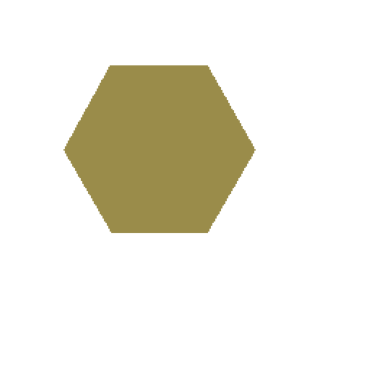

In [ ]:
 # Create a blank white image
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Generate random center and side length for the hexagon
center = np.random.randint(50, image_size[0] - 100, size=2)
side_length = np.random.randint(30, min(image_size[0], image_size[1]) // 2 - 50)

# Calculate the vertices of the hexagon
vertices = []
for i in range(6):
    angle_deg = 60 * i
    angle_rad = math.radians(angle_deg)
    x = int(center[0] + side_length * math.cos(angle_rad))
    y = int(center[1] + side_length * math.sin(angle_rad))
    vertices.append((x, y))

# Draw the hexagon on the image
cv2.fillPoly(image, [np.array(vertices)], generate_random_color())
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

Display the square image

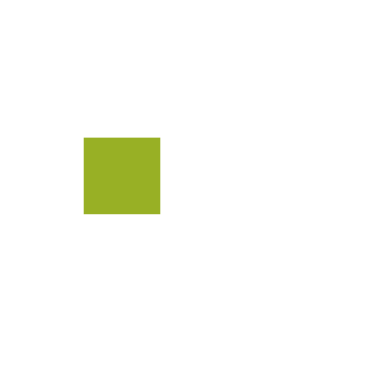

In [ ]:
 # Create a blank white image
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Generate random top-left corner coordinates and side length for the square
top_left = np.random.randint(50, image_size[0] - 150, size=2)
side_length = np.random.randint(50, min(image_size[0], image_size[1]) // 2 - 50)

# Calculate the bottom-right corner coordinates
bottom_right = top_left + side_length

# Draw the square on the image
cv2.rectangle(image, tuple(top_left), tuple(bottom_right), generate_random_color(), -1)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

Display the circle image

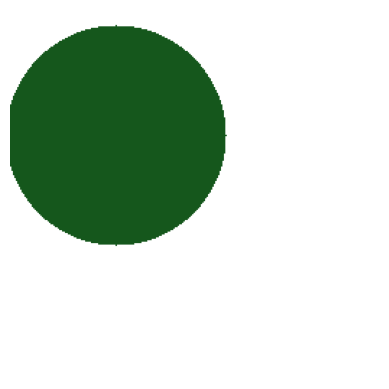

In [ ]:
# Create a blank white image
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Generate random center and radius for the circle
center = np.random.randint(70, image_size[0] - 150, size=2)
radius = np.random.randint(50, min(image_size[0], image_size[1]) // 2 - 50)

# Draw the circle on the image
cv2.circle(image, tuple(center), radius, generate_random_color(), -1)


plt.imshow(image)
plt.axis('off')
plt.show()

Display the triangle image

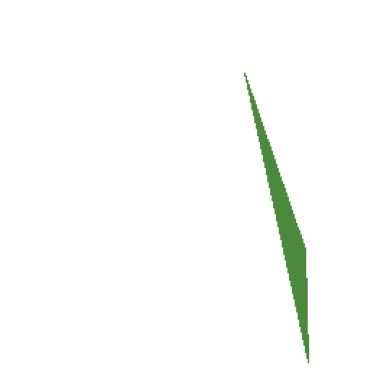

In [ ]:
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255
# Generate random coordinates for the triangle vertices
pt1 = np.random.randint(10, image_size[0] - 10, size=2)
pt2 = np.random.randint(10, image_size[0] - 10, size=2)
pt3 = np.random.randint(10, image_size[0] - 10, size=2)

# Draw the triangle on the image
cv2.drawContours(image, [np.array([pt1, pt2, pt3])], 0, generate_random_color(), -1)


# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

Combine the labels for all shapes

In [ ]:
# Define the labels for circles, triangles, squares, and hexagons
circle_label = 0
triangle_label = 1
square_label = 2
hexagon_label = 3

# Generate the corresponding labels for circle, triangle, square, and hexagon datasets
y_train_circle = [circle_label] * num_samples
y_train_triangle = [triangle_label] * num_samples
y_train_square = [square_label] * num_samples
y_train_hexagon = [hexagon_label] * num_samples

# Combine the labels for all shapes
y_train = np.array(y_train_circle + y_train_triangle + y_train_square + y_train_hexagon)


Convert labels to one-hot encoding

In [ ]:

num_classes = 4 # Assuming binary classification (circle vs. triangle)
y_train_encoded = to_categorical(y_train, num_classes)

# Define the input sequence data
num_samples = 4000
sequence_length = 20

# RNN input sequence data
input_sequence_data = np.zeros((num_samples, sequence_length))

# Define the CNN component

It specifies that the incoming data will have a certain shape.
shape=(256, 256, 3): The shape argument defines the shape of the input data. 
In this case, (256, 256, 3) indicates that the input will be a 3-dimensional
 tensor with a height and width of 256 pixels, and 3 color channels (red, green, and blue).


In [ ]:

input_image = Input(shape=(256, 256, 3))
conv1 = Conv2D(64, (3, 3), activation='relu')(input_image)  # Apply 64 filters of size 3x3 to the input image
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)  # Perform max pooling with a pool size of 2x2
conv2 = Conv2D(128, (3, 3), activation='relu')(pool1)  # Apply 128 filters of size 3x3 to the pooled output
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)  # Perform max pooling with a pool size of 2x2
flatten = Flatten()(pool2)  # Flatten the output to a 1D vector
cnn_output = Dense(256, activation='relu')(flatten)  # Apply a fully connected layer with 256 units and ReLU activation


Epoch 1/5
50/50 [==============================] - 15s 234ms/step - loss: 379.5964 - accuracy: 0.5306 - val_loss: 3.2226 - val_accuracy: 0.0800
Epoch 2/5
50/50 [==============================] - 11s 220ms/step - loss: 0.4328 - accuracy: 0.8609 - val_loss: 3.4407 - val_accuracy: 0.0838
Epoch 3/5
50/50 [==============================] - 11s 220ms/step - loss: 0.1587 - accuracy: 0.9488 - val_loss: 3.7394 - val_accuracy: 0.3575
Epoch 4/5
50/50 [==============================] - 11s 222ms/step - loss: 0.0727 - accuracy: 0.9803 - val_loss: 4.4395 - val_accuracy: 0.2775
Epoch 5/5
50/50 [==============================] - 11s 221ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 4.1241 - val_accuracy: 0.3663


Define the RNN component

In [ ]:

input_caption = Input(shape=(20,))
embedding_dim = 100
vocab_size = 10000
embedding = Embedding(vocab_size, embedding_dim)(input_caption)  # Create word embeddings for the caption input
lstm = LSTM(256)(embedding)  # Apply LSTM with 256 units to the embedded sequence
rnn_output = Dense(256, activation='relu')(lstm)  # Apply a fully connected layer with 256 units and ReLU activation


Combine the CNN and RNN outputs

In [ ]:

combined = concatenate([cnn_output, rnn_output])  # Concatenate the outputs of the CNN and RNN component


Add additional layers for prediction

In [ ]:

dense1 = Dense(256, activation='relu')(combined)  # Apply a fully connected layer with 256 units and ReLU activation

output = Dense(num_classes, activation='softmax')(dense1)  # Apply a fully connected layer with softmax activation for classification

Create the model

In [ ]:

model = Model(inputs=[input_image, input_caption], outputs=output)  # Define the model with input and output layers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model with loss and optimizer

Train the model

In [ ]:

model.fit([X_train, input_sequence_data], y_train_encoded, batch_size=64, epochs=5, validation_split=0.2)

# Make predictions & Interpret the predictions


In [224]:

# Select 12 random indices for the test images
random_indices = np.random.choice(len(X_train), size=12, replace=False)

# Create X_test by selecting the images based on the random indices
X_test = [X_train[i] for i in random_indices]

# Convert the images to a numpy array
X_test = np.array(X_test)


Ploting 12 test images

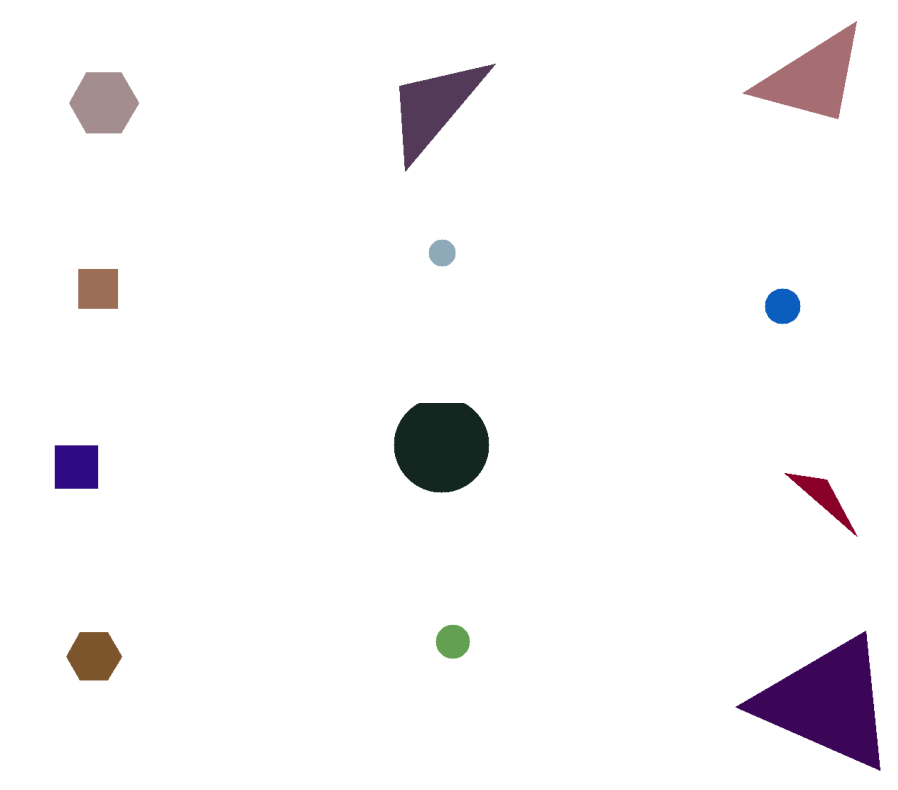

In [225]:
# Reshape the images to have a single channel if needed
X_test = X_test.reshape((-1, 256, 256, 3))

# Calculate the number of rows and columns for subplots
num_images = len(X_test)
num_rows = (num_images + 2) // 3  # Round up to the nearest integer
num_cols = min(3, num_images)

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if there is only one row or one column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot the images in subplots
for i, image in enumerate(X_test):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Print Predicted 12 image labels 

In [226]:

# Select the corresponding input sequences based on the random indices
input_sequence_test = input_sequence_data[random_indices]

# Make predictions using the composite model
predictions = model.predict([X_test, input_sequence_test])

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Define a dictionary to map class labels to their corresponding names
class_labels = {
    0: "Circle",
    1: "Triangle",
    2: "Square",
    3: "Hexagon"
}

# Print the predicted labels with their corresponding class names
for label in predicted_labels:
    print(class_labels[label])

1/1 [==============================] - 0s 26ms/step
Hexagon
Triangle
Triangle
Square
Circle
Circle
Square
Circle
Triangle
Circle
Circle
Triangle


In conclusion, in one case, the model made a mistake by misclassifying a hexagon as a triangle. This suggests that the model might have encountered some difficulty in distinguishing between the two shapes or the specific characteristics of the given hexagon image might have caused confusion.

While the model's overall accuracy was high, this misclassification highlights the importance of further refining the model to improve its performance on challenging cases. Possible avenues for improvement include increasing the size and diversity of the training dataset, adjusting the model architecture or hyperparameters, or employing advanced techniques such as data augmentation or transfer learning.

Despite this single misclassification, the project demonstrates the potential of composite artificial neural networks in predicting shapes based on image data and accompanying input sequences. With further refinement and optimization, this model can serve as a valuable tool in shape classification tasks, aiding in various applications ranging from object recognition to computer vision tasks.